In [2]:
import numpy as np
import matplotlib.pyplot as plt

class image_unit:
    def __init__(self) -> None:
        self.num_of_points = 0
        self.cord_of_points = []
        self.raw_image = []
    def print_data(self) -> None:
        print(self.num_of_points)
        print(self.cord_of_points)
        print(self.raw_image)
        # Plotting the array as a grayscale image
        plt.imshow(self.raw_image, cmap='viridis')
        plt.colorbar()  # Adding a colorbar to show intensity scale
        plt.title('Visualization')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.show()

10.0
[[4.90713265801572, 28.039538291703874], [32.84440350822294, 13.578512105334035], [52.973610967129076, 13.170954812016848], [6.088365442640924, 8.067917290512826], [16.436996322861567, 10.291193687624183], [51.67877819316273, 59.35360808253424], [30.56994401674475, 52.702905728831574], [20.15551056223808, 48.038847909050986], [41.31064392120531, 7.420266202730436], [22.67208069830488, 19.913075159064046]]
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 8.0, 18.0, 34.0, 8.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

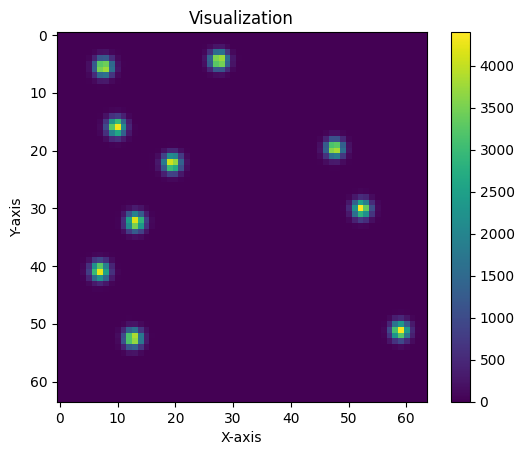

In [3]:
# Specify the path to your text file
file_path = './Clusters_2D_100.txt'
images = []

# For every image:
# Line 1: number of clusters(10)
# Line 2-11: exact positions of the points
# Others: grayscale image
with open(file_path, 'r') as file:
    for line in file:
        numbers = []
        numbers = [float(s) for s in line.strip().split()]
        if len(numbers) == 1:
            images.append(image_unit())
            images[len(images) - 1].num_of_points = numbers[0]
        elif len(numbers) == 2:
            images[len(images) - 1].cord_of_points.append(numbers)
        else:
            images[len(images) - 1].raw_image.append(numbers)


# Print the list of numbers
for i in range(1):
    images[i].print_data()
    

In [4]:
def find_local_maxima(matrix):
    rows = len(matrix)
    cols = len(matrix[0])
    
    def is_local_maxima(i, j):
        current = matrix[i][j]
        # Check all eight possible neighbors
        neighbors = [
            (i-1, j-1), (i-1, j), (i-1, j+1),
            (i, j-1),            (i, j+1),
            (i+1, j-1), (i+1, j), (i+1, j+1)
        ]
        for x, y in neighbors:
            if 0 <= x < rows and 0 <= y < cols:
                if matrix[x][y] >= current:
                    return False
        return True

    local_maxima = []
    for i in range(rows):
        for j in range(cols):
            if is_local_maxima(i, j):
                local_maxima.append((i, j))
    
    return local_maxima

# 示例矩阵
matrix = images[0].raw_image
# 查找局部最大值
local_maxima = find_local_maxima(matrix)
print("局部最大值的位置:", local_maxima)

局部最大值的位置: [(4, 28), (6, 8), (16, 10), (20, 48), (22, 19), (30, 52), (32, 13), (41, 7), (51, 59), (52, 13)]


In [10]:
def find_weighted_average_coordinates(matrix):
    rows = len(matrix)
    cols = len(matrix[0])
    
    def is_local_maxima(i, j):
        current = matrix[i][j]
        # Check all eight possible neighbors
        neighbors = [
            (i-1, j-1), (i-1, j), (i-1, j+1),
            (i, j-1),            (i, j+1),
            (i+1, j-1), (i+1, j), (i+1, j+1)
        ]
        for x, y in neighbors:
            if 0 <= x < rows and 0 <= y < cols:
                if matrix[x][y] >= current:
                    return False
        return True

    # Find local maxima coordinates
    local_maxima = []
    for i in range(rows):
        for j in range(cols):
            if is_local_maxima(i, j):
                local_maxima.append((i, j))
    
    # Classify non-zero points based on their nearest local maxima
    groups = {}
    for i in range(rows):
        for j in range(cols):
            if matrix[i][j] != 0:
                min_distance = float('inf')
                nearest_maxima = None
                for x, y in local_maxima:
                    distance = abs(x - i) + abs(y - j)
                    if distance < min_distance:
                        min_distance = distance
                        nearest_maxima = (x, y)
                if nearest_maxima not in groups:
                    groups[nearest_maxima] = []
                groups[nearest_maxima].append((i, j, matrix[i][j]))  # Include the value of the point
    
    # Calculate the weighted average coordinates of each group
    result = []
    for key, points in groups.items():
        total_weight = sum(p[2] for p in points)
        if total_weight == 0:
            raise ValueError("Total weight cannot be zero")
        weighted_sum_x = sum(p[0] * p[2] for p in points)
        weighted_sum_y = sum(p[1] * p[2] for p in points)
        avg_coordinates = (weighted_sum_x / total_weight, weighted_sum_y / total_weight)
        result.append(avg_coordinates)
    
    return result

# 示例矩阵
matrix = images[0].raw_image
# 查找局部最大值的坐标并分类非零点，然后计算每组的加权平均坐标
num_weighted_average_points = len(weighted_average_coordinates)
print("加权平均点的个数：", num_weighted_average_points)
weighted_average_coordinates = find_weighted_average_coordinates(matrix)
print("每一组的加权平均坐标：", weighted_average_coordinates)


加权平均点的个数： 10
每一组的加权平均坐标： [(4.395466666666667, 27.5421), (5.588713709543015, 7.572447585080497), (15.92806426880896, 9.78755958531951), (19.651933333333332, 47.53556666666667), (22.174033333333334, 19.4202), (30.074666666666666, 52.194266666666664), (32.348533333333336, 13.0796), (40.80896666666667, 6.918), (51.17313333333333, 58.851333333333336), (52.465133333333334, 12.676133333333333)]
